In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf



In [20]:
import sys
sys.path.insert(1, '../Pre Processing Stage/')
sys.path.insert(1, '../Processing Stage/HoG')


from commonfunctions import *
from main import *
from hog import *

In [21]:
final_hog=np.load('./numpyArrays/final_hog.npy' )
targets_hog=np.load('./numpyArrays/targets_hog.npy')



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from tensorflow import keras

In [23]:
classifiers = {
    'SVM': SVC(random_state=40, C=1),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'rnd': RandomForestClassifier(random_state=40),
    'voting_clf_soft' : VotingClassifier(
    estimators=[
        ('KNN', KNeighborsClassifier(n_neighbors=7)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42, probability=True, C=1))
    ],
    voting='soft'), 
    'voting_clf_hard': VotingClassifier(
    estimators=[
            ('KNN', KNeighborsClassifier(n_neighbors=7)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(random_state=42,C=1))
        ],
    voting='hard'),
    
}

In [44]:
from sklearn.metrics import confusion_matrix
import copy
from sklearn.metrics import precision_score, recall_score, f1_score



def train_model(x,y,testSize):
    models=[]
    mats=[]
    precisions=[]
    recalls=[]
    f1s=[]

    X_train, X_test, y_train, y_test=train_test_split(x, y,test_size=testSize,stratify=y)

    for model_name, model in copy.deepcopy(classifiers).items():
        
        print('############## Training', model_name, "##############")
        model.fit(X_train, y_train)

        accuracy = model.score(X_test, y_test)

        models.append({model_name:model})

        print(model_name, 'accuracy:', accuracy*100, '%')
        y_pred = model.predict(X_test)

        mat = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred,average='micro')
        recall = recall_score(y_test, y_pred,average='micro')
        f1 = f1_score(y_test, y_pred,average='micro')

        mats.append(mat)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)


        print(mat)
            

    return models,mats,precisions,recalls,f1s

In [45]:
models_hog,confusion_matrices,precisions,recalls,f1s=train_model(final_hog,targets_hog,0.2)

############## Training SVM ##############
SVM accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]
############## Training KNN ##############
KNN accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]
############## Training rnd ##############
rnd accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]
############## Training voting_clf_soft ##############
voting_clf_soft accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]
############## Training voting_clf_hard ##############
voting_clf_hard accuracy: 100.0 %
[[17  0  0]
 [ 0 21  0]
 [ 0  0 20]]


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
modelnames = ['SVM', 'KNN', 'rnd', 'voting_clf_soft','voting_clf_hard' ]

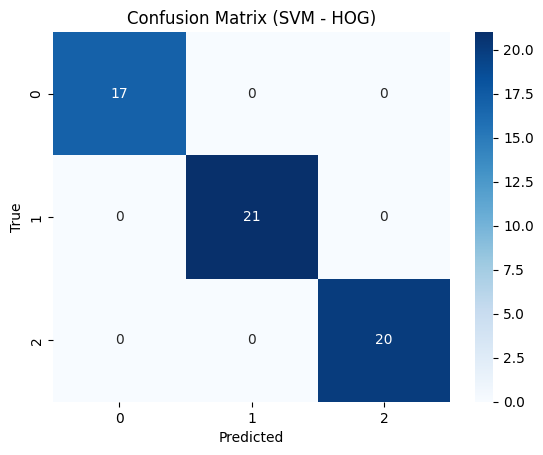

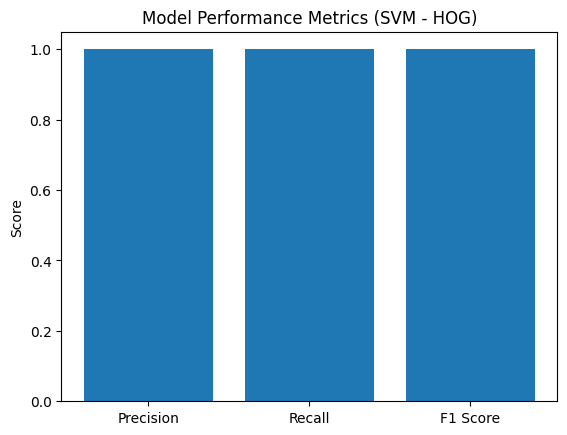

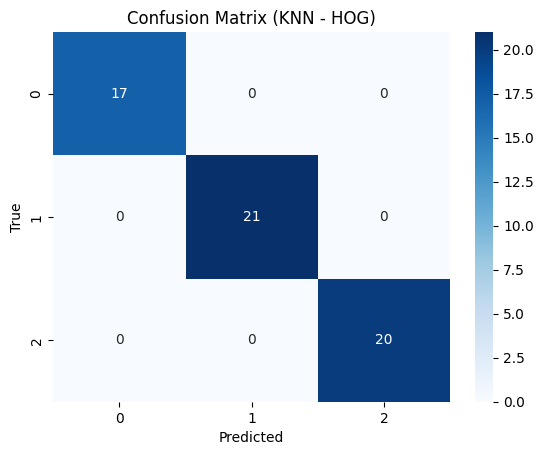

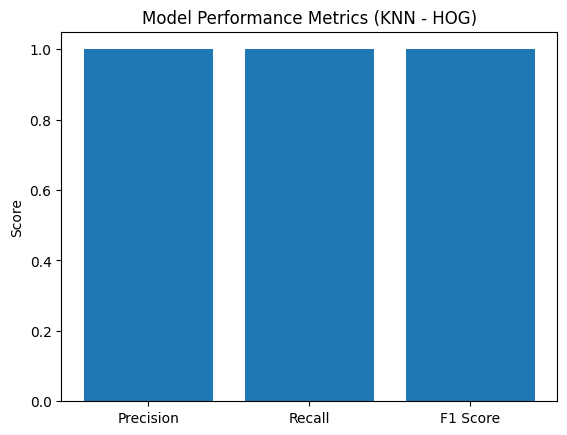

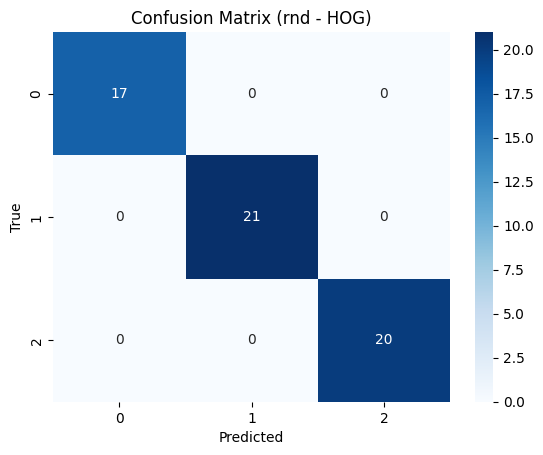

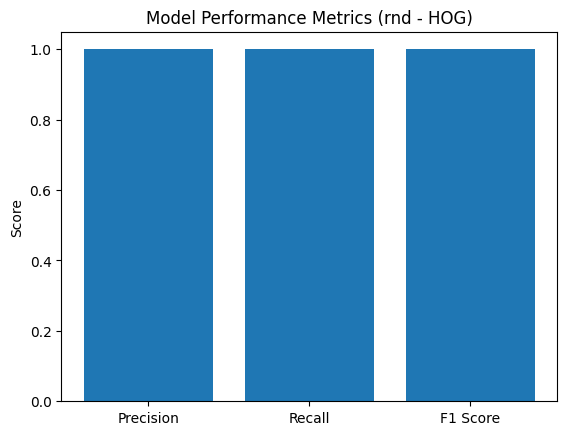

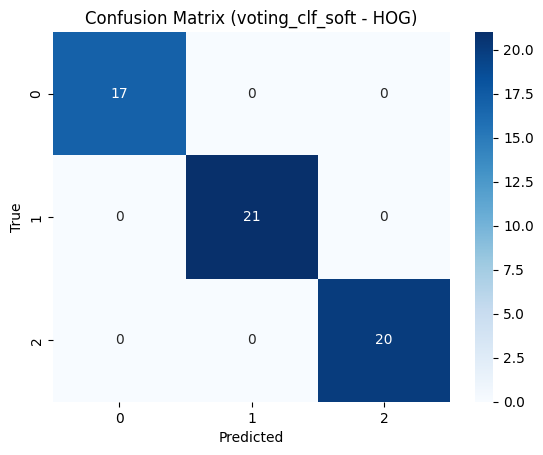

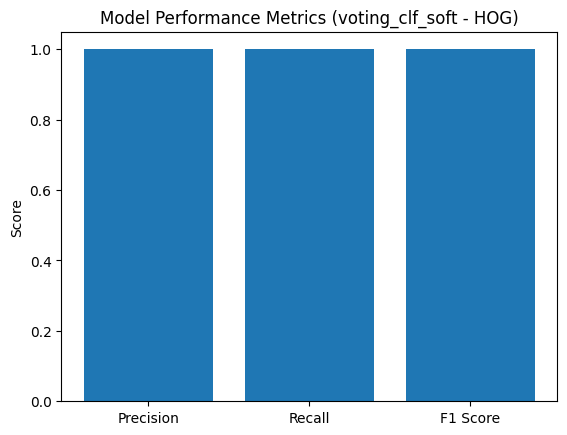

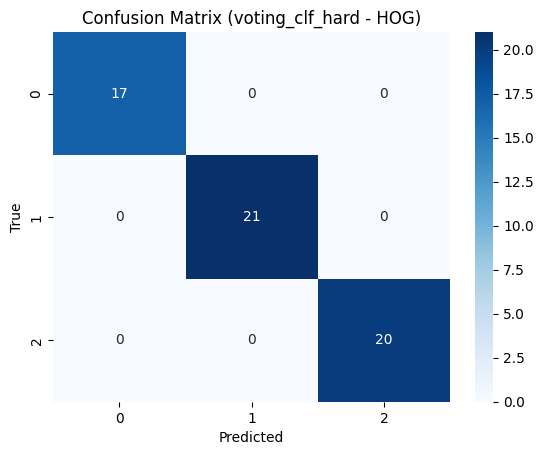

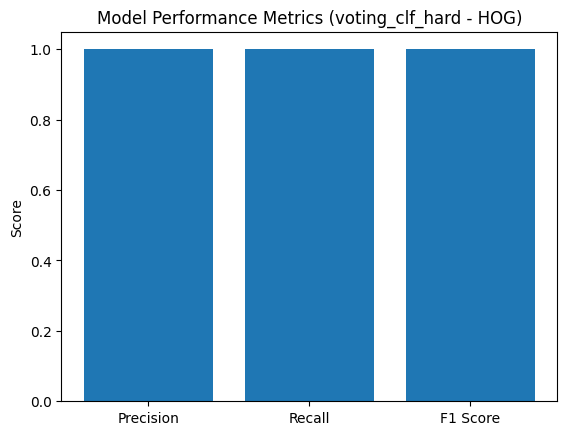

In [50]:
for i in range(5):
        plt.figure()  

        sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(f"Confusion Matrix ({modelnames[i]} - HOG)")
        # plt.show()

        plt.savefig(f"./figures/Confusion Matrix ({modelnames[i]} - HOG)")
        plt.figure()


        plt.bar(["Precision", "Recall", "F1 Score"],
                [precisions[i], recalls[i], f1s[i]])
        plt.ylabel("Score")
        plt.title(f"Model Performance Metrics ({modelnames[i]} - HOG)")
        # plt.show()
        plt.savefig(f"./figures/Model Performance Metrics ({modelnames[i]} - HOG)")

In [26]:
import pickle

def save_models(modelsArray,suffix):
    for model in modelsArray:
        pickle.dump(next(iter(model.values())), open(
            f"./models/{next(iter(model.keys()))}_{suffix}.pkl", "wb"))

In [27]:
save_models(models_hog,"hog")